<a href="https://colab.research.google.com/github/pikey-msc/RiesgosFinancieros/blob/master/2020-1/Insumos/R_SH_Acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso de carga de librerías en R de todas las que se utilizarán

In [1]:
#require(quantmod)
install.packages("quantmod")
library(quantmod)
#require(data.table)
install.packages("data.table")
library(data.table)
#require("PerformanceAnalytics")
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

con = gzcon(url('https://github.com/systematicinvestor/SIT/raw/master/sit.gz', 'rb'))
source(con)
close(con)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘data.table’

The following objects are masked from ‘package:xts’:

    first, last

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘quadprog’


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

W

Cargamos parámetros para valoración:
	 
   **Pérdidas y Ganancias simulación histórica (sin alisado)**
   
	 Un enfoque más claro es suponer que tenemos:
1.   Una matriz $X_{(n+1)\times m}$ de $m$ factores de riesgo y $n+1$ observaciones. 
2.   Denotemos el vector de precios actual como $X_{00}:=(x_{0,1},x_{0,2},\ldots,x_{0,m})$. 
3.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
4.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
5.   Sea $M_{1\times r}=(m_1,\ldots,m_r)$ el vector de posiciones nominales de cada instrumento, es decir, el número de contratos que se tienen por instrumento $m_i\in R$ $(i=1,\ldots,r)$.

In [0]:

#Cargar los símbolos de yahoo finance para EQ
Symbols<-c  ( "GCARSOA1.MX", "WALMEX.MX" )#tienen que ir en orden alfabético
pos_eq=c(1000,2000) #monto inicial invertido en acciones
#Cargar los símbolos de yahoo finance para FX
SymbolsFX<-c("EURUSD=X","GBPUSD=X","USDMXN=X" ) #tienen que ir en orden alfabético
pos_fx=c(1000,-500,200) #monto inicial invertido en divisas
nh=3660 #días de historia

pos=cbind(t(pos_fx),t(pos_eq))


Ahora definimos el "*environment*"

In [3]:
start_date=Sys.Date()-nh #fecha inicial

#Creación del objeto para guardar los datos
dataEnv<-new.env()
dataEnvFX<-new.env()

#obtener los datos
getSymbols.yahoo(Symbols,env=dataEnv,from=start_date)
getSymbols.yahoo(SymbolsFX,env=dataEnvFX,from=start_date)

#muestra
tail(dataEnvFX$`GBPUSD=X`)



Warning message:
“GCARSOA1.MX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“WALMEX.MX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "GCARSOA1.MX" "WALMEX.MX"

Warning message:
“EURUSD=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“GBPUSD=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“USDMXN=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "EURUSD=X" "GBPUSD=X" "USDMXN=X"

           GBPUSD=X.Open GBPUSD=X.High GBPUSD=X.Low GBPUSD=X.Close
2019-09-17      1.242730      1.249531     1.239465       1.242854
2019-09-18      1.250313      1.250625     1.244137       1.250266
2019-09-19      1.247007      1.249859     1.244245       1.247054
2019-09-20      1.252662      1.258305     1.246479       1.252505
2019-09-23      1.247085      1.249172     1.241527       1.247194
2019-09-24      1.243441      1.243843     1.242900       1.243735
           GBPUSD=X.Volume GBPUSD=X.Adjusted
2019-09-17               0          1.242854
2019-09-18               0          1.250266
2019-09-19               0          1.247054
2019-09-20               0          1.252505
2019-09-23               0          1.247194
2019-09-24               0          1.243735

Limpiamos NA's y nos quedamos con los precios de cierre

In [4]:
#limpiarlos, alinearnos y quedarnos con el precio de cierre 

bt.prep(dataEnv,align='remove.na',fill.gaps = T)
bt.prep(dataEnvFX,align='remove.na',fill.gaps=T)

#muestra de datos
head(dataEnv$prices)
head(dataEnvFX$prices)

#muestra de datos
head(dataEnv$prices)
head(dataEnvFX$prices)


#Nos quedamos con los precios
stock_prices = dataEnv$prices
tail(stock_prices[,])



stock_pricesFX=dataEnvFX$prices
tail(stock_pricesFX)



           GCARSOA1.MX WALMEX.MX
2009-09-17     24.1518    24.695
2009-09-18     23.3451    24.775
2009-09-21     22.3477    24.355
2009-09-22     22.1082    24.250
2009-09-23     21.3015    23.595
2009-09-24     20.3872    23.390

           EURUSD=X GBPUSD=X USDMXN=X
2009-09-16 1.471194 1.647989  13.1851
2009-09-17 1.473297 1.643818  13.2699
2009-09-18 1.471605 1.627101  13.2400
2009-09-21 1.468407 1.622007  13.3787
2009-09-22 1.481196 1.638404  13.3376
2009-09-23 1.472602 1.635109  13.3710

           GCARSOA1.MX WALMEX.MX
2009-09-17     24.1518    24.695
2009-09-18     23.3451    24.775
2009-09-21     22.3477    24.355
2009-09-22     22.1082    24.250
2009-09-23     21.3015    23.595
2009-09-24     20.3872    23.390

           EURUSD=X GBPUSD=X USDMXN=X
2009-09-16 1.471194 1.647989  13.1851
2009-09-17 1.473297 1.643818  13.2699
2009-09-18 1.471605 1.627101  13.2400
2009-09-21 1.468407 1.622007  13.3787
2009-09-22 1.481196 1.638404  13.3376
2009-09-23 1.472602 1.635109  13.3710

           GCARSOA1.MX WALMEX.MX
2019-09-13       58.27     57.67
2019-09-17       58.37     56.73
2019-09-18       58.16     55.50
2019-09-19       57.94     55.19
2019-09-20       60.48     55.01
2019-09-23       60.34     55.16

           EURUSD=X GBPUSD=X USDMXN=X
2019-09-17 1.100594 1.242854  19.4224
2019-09-18 1.107469 1.250266  19.3528
2019-09-19 1.103144 1.247054  19.3967
2019-09-20 1.104850 1.252505  19.4292
2019-09-23 1.101904 1.247194  19.4189
2019-09-24 1.099626 1.243735  19.4868

Cambiar moneda a pesos mexicanos, identificar 

In [5]:
#cambiar todo a pesos mexicanos
stock_pricesFX=cbind(stock_pricesFX[,1,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,2,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,3,with=F])
tail(stock_pricesFX)

stock_prices_EQFX=merge(stock_pricesFX,stock_prices,join = "inner")
#stock_prices_EQFX
tail(stock_prices_EQFX)


#Preciso actuales
#x0=as.data.table(as.matrix(stock_prices_EQFX[nrow(stock_prices_EQFX),])) #valores actuales
x0=stock_prices_EQFX[nrow(stock_prices_EQFX),]
x0


           EURUSD.X GBPUSD.X USDMXN.X
2019-09-17 21.37618 24.13921  19.4224
2019-09-18 21.43263 24.19615  19.3528
2019-09-19 21.39735 24.18873  19.3967
2019-09-20 21.46635 24.33517  19.4292
2019-09-23 21.39776 24.21914  19.4189
2019-09-24 21.42819 24.23641  19.4868

           EURUSD.X GBPUSD.X USDMXN.X GCARSOA1.MX WALMEX.MX
2019-09-13 21.48458 23.95415  19.4285       58.27     57.67
2019-09-17 21.37618 24.13921  19.4224       58.37     56.73
2019-09-18 21.43263 24.19615  19.3528       58.16     55.50
2019-09-19 21.39735 24.18873  19.3967       57.94     55.19
2019-09-20 21.46635 24.33517  19.4292       60.48     55.01
2019-09-23 21.39776 24.21914  19.4189       60.34     55.16

           EURUSD.X GBPUSD.X USDMXN.X GCARSOA1.MX WALMEX.MX
2019-09-23 21.39776 24.21914  19.4189       60.34     55.16


Paso 1. (Generación de rendimientos) Construir ${\Delta X}_{n\times m}$ que es la matriz de diferencias basados en el operador $T_j$, es decir
		$${\Delta X}_t=\Big[ T_j(\frac{x_{t,1}}{x_{t+1,1}}), T_j(\frac{x_{t,2}}{x_{t+1,2}}),\ldots, T_j(\frac{x_{t,m}}{x_{t+1,m}})\Big]\quad t=0,1,\ldots, n-1.$$

In [6]:

stock_returns = Return.calculate(stock_prices_EQFX, method = c("continuous"))
head(stock_returns[,1:3])

#CONFIRMACIÓN
DeltaX=as.matrix(log(as.matrix(stock_prices_EQFX[2:nrow(stock_prices_EQFX)])/as.data.table(as.matrix(stock_prices_EQFX[1:(nrow(stock_prices_EQFX)-1)]))))
#tail(DeltaX)
head(DeltaX)

               EURUSD.X      GBPUSD.X     USDMXN.X
2009-09-17           NA            NA           NA
2009-09-18 -0.003404867 -0.0124774432 -0.002255762
2009-09-21  0.008245837  0.0072857071  0.010421340
2009-09-22  0.005594954  0.0069815501 -0.003076776
2009-09-23 -0.003317897  0.0004879399  0.002501068
2009-09-24  0.005119434 -0.0154189227  0.010230934

EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
-0.003404867,-0.0124774432,-0.002255762,-0.033971799,0.003234286
0.008245837,0.0072857071,0.010421340,-0.043663704,-0.017097913
0.005594954,0.0069815501,-0.003076776,-0.010774827,-0.004320550
-0.003317897,0.0004879399,0.002501068,-0.037171088,-0.027381835
0.005119434,-0.0154189227,0.010230934,-0.043870289,-0.008726245
0.005702024,0.0058895805,0.003384723,0.009548572,0.004691883


Análisis gráfico

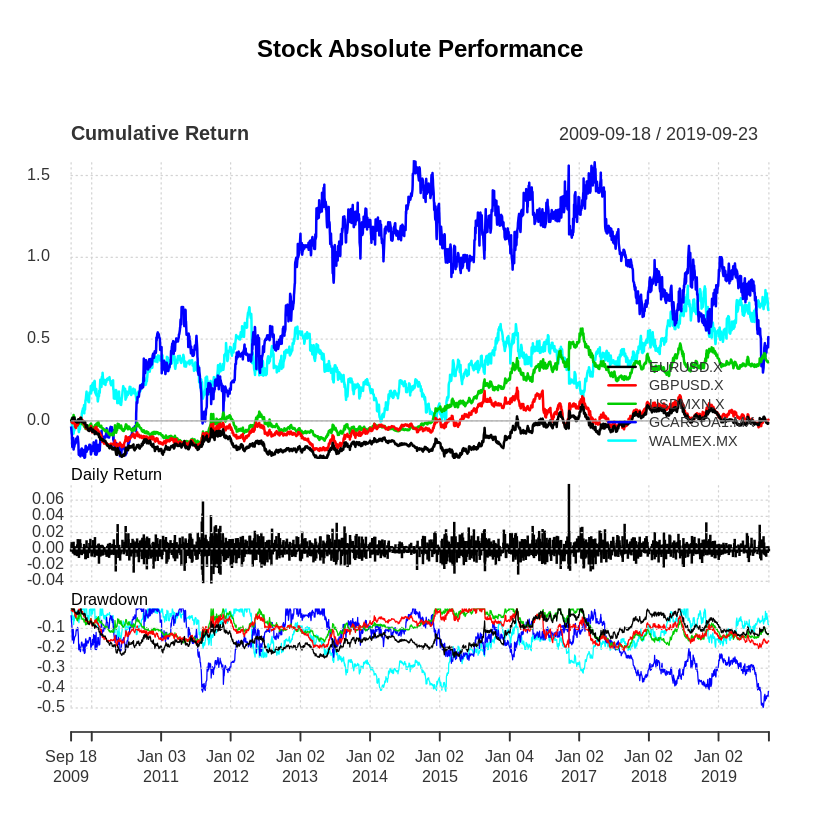

In [7]:
charts.PerformanceSummary(stock_returns,main='Stock Absolute Performance',legend.loc="bottomright")


Paso 2. Construir ${X^\ast}_{n\times m}$ que es la matriz de factores de riesgo simulada basada en el vector de precios actual $X_{00}$
		$$X_{t}^\ast=\Big[x_{0,1}T^{-1}_j(\Delta x_{t,1}), x_{0,2}T^{-1}_j(\Delta x_{t,2}),\ldots, x_{0,m}T^{-1}_j(\Delta x_{t,m})\Big]\quad (t=1,\ldots,n\quad j=1,2),$$
		donde $T_1(x)=\ln(x)$, $T_2(x)=x-1$.

Paso 3. Construcción de la matriz de reevaluación del portafolio basada en los escenarios históricos $Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$Y_t=[m_1f_1(X_{t}^\ast), m_2f_2(X_{t}^\ast),\ldots, m_rf_r(X_{t}^\ast)]\quad (t=1,\ldots,n).$$
    
Paso 4. Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios históricos $\Delta Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$\Delta Y_t=Y_0-Y_{t}=[m_1(f_1(X_{00})-f_1(X_{t}^\ast)), m_2( f_2(X_{00})-f_2(X_{t}^\ast)),\ldots, m_r(f_r(X_{00})-f_r(X_{t}^\ast))],$$
		para $(t=1,\ldots,n)$. Se puede obtener el vector de pérdidas totales ${\Delta YT}_{n\times m}$ muy fácilmente, esto es $\Delta YT=\sum_{k=1}^r Y_{kt}$ $(t=1,\ldots,n)$, incluso se puede hacer lo mismo por tipo de riesgo.


In [8]:
n=nrow(DeltaX)
n
m=ncol(DeltaX)
m


V0=x0*pos #Valor del portafolio
V0
VT=sum(V0)
sum(V0)
#Cálculo de Distribución de Pérdidas y Ganancias
X_ast<-matrix(0,n,m) #matriz de simulacion de precios
Y_ast<-matrix(0,n,m) #matriz de simulacion de instrumentos financieros
PL<-matrix(0,n,m) 
PLTdCAcc<-matrix(0,n,2) #POR FACTOR DE RIESGO
PLT=matrix(0,n,1) #TOTAL
for (i in (1:n))
{
  X_ast[i,]=x0*exp(DeltaX[i,]) #Simulación del precio
  Y_ast[i,]=X_ast[i,]*pos
  PL[i,]=Y_ast[i,]-V0  #Pérdidas y ganancias por posición
  PLTdCAcc[i,]=c(sum(PL[i,1:(len(pos_fx))]),sum(PL[i,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))])) #Pérdidas y ganancias por factor de riesgo
  PLT[i]=sum(PL[i,]) #Pérdidas y ganancias totales
}
PL[1:10,]
PLTdCAcc[1:10,]
PLT[1:10,]


[1] 2509

[1] 5

           EURUSD.X  GBPUSD.X USDMXN.X GCARSOA1.MX WALMEX.MX
2019-09-23 21397.76 -12109.57  3883.78       60340    110320

[1] 183832

-72.73264,150.157704,-8.751010,-2015.4307,357.38409
177.17194,-88.548943,40.685822,-2577.9764,-1870.20787
120.05504,-84.839365,-11.931156,-646.6630,-475.61486
-70.87793,-5.910183,9.725757,-2201.7296,-2979.78187
109.82533,185.284376,39.938655,-2589.9079,-958.49125
122.35907,-71.530711,13.167792,578.9203,518.82475
-124.98893,86.389990,-5.959926,2436.4311,1760.42553
-50.81324,-59.772304,-1.291389,826.7413,-46.20733
57.40196,-3.452649,-6.401677,-1073.8048,-2149.54117
187.74258,-146.254648,71.627385,-3583.4366,-2852.29060


68.67406,-1658.047
129.30882,-4448.184
23.28452,-1122.278
-67.06236,-5181.511
335.04836,-3548.399
63.99616,1097.745
-44.55887,4196.857
-111.87693,780.534
47.54764,-3223.346
113.11531,-6435.727


[1] -1589.3725 -4318.8754 -1098.9933 -5248.5738 -3213.3507  1161.7413
 [7]  4152.2978   668.6571 -3175.7983 -6322.6119

Paso 5. Obtenerla medida de riesgo basado en un nivel de confianza de la matriz ${\Delta Y}_{\cdot k}$ $(k=1,\ldots,r)$ y $\Delta YT$.

Las pérdidas y ganancias vía simulación histórica sin alisado es donde se ponderan los escenarios históricos con un mismo peso para todos, es decir cada escenario tiene una probabilidad de ocurrencia de $1/n$.

In [9]:
#VaR por posición sin alisado
VaRCont=matrix(0,1,m)
CVaRCont=matrix(0,1,m)
alpha=0.95


for (i in (1:m))
{
VaRCont[i]=quantile(PL[,i],1-alpha,n)
CVaRCont[i]= mean(PL[which(PL[,i]<VaRCont[i]),i])
}

#Resumen medidas de riesgo por posición
VaRCont=as.data.table(VaRCont)
CVaRCont=as.data.table(CVaRCont)

#valores absolutos con respecto al portafolio sin alisado
names(VaRCont)=names(x0)
names(CVaRCont)=names(x0)
VaRCont/abs(as.matrix(V0))
CVaRCont/abs(as.matrix(V0))


#medias de riesgo por factor de riesgo acciones y divisas

VaRfr=matrix(0,1,2)
CVaRfr=matrix(0,1,2)

for (i in (1:2))
{
  VaRfr[i]=quantile(PLTdCAcc[,i],1-alpha,n)
  CVaRfr[i]= mean(PLTdCAcc[which(PLTdCAcc[,i]<VaRfr[i]),i])
}



VaRfr=as.data.table(VaRfr)
CVaRfr=as.data.table(CVaRfr)

names(VaRfr)=c("divisas", "acciones")
names(CVaRfr)=c("divisas", "acciones")
#VALORES ABSOLUTOS
VaRfr/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))
CVaRfr/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))


#hist(as.matrix(PL[,3]))
#hist(as.matrix(PL[,2]))


#VaR Total
VaRTotal=quantile(PLT,1-alpha,n)
CVaRTotal= mean(PLT[which(PLT<VaRTotal),])

#VALOR ABSOLUTOS
VaRTotal
CVaRTotal
VaRTotal/sum(V0)
CVaRTotal/sum(V0)

EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.0146085,-0.0141307,-0.0112789,-0.03070152,-0.02241808


EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.01973307,-0.01978449,-0.01570553,-0.04388783,-0.03368344


divisas,acciones
<dbl>,<dbl>
-0.00301672,-0.02001042


divisas,acciones
<dbl>,<dbl>
-0.004023694,-0.03014419


5% 
-3316.845

[1] -5078.793

5% 
-0.01804281

[1] -0.02762736

In [0]:
w0 <- 0.05 #@param {type:"number"}


Para las pérdidas y ganancias vía simulación histórica con alisado, se siguen los mismos pasos que en las pérdidas y ganancias sin alisado, pero no se le da el mismo peso a los escenarios, comúnmente en este método se ponderan más los escenarios más recientes y se les da menos peso a los más viejos, utilizando la función:
	$$w_i=\lambda^{i-1}w_1\quad (i=1,\ldots,n),$$
	\vskip-0.05cm donde se tienen que estimar las constantes $\lambda\in(0,1)$ y $w_1\in(0,1)$ tal que $\sum_{i=1}^n\lambda^i w_1=1$. 
	Donde $w_i$ representa la probabilidad del escenario más reciente, y $\lambda$ la constante que indica que tanto decrece la probabilidad inicial con respecto al escenario $i$, si $\lambda$ tiende a 1, no existe decrecimiento, si $\lambda$ tiende a cero, el decrecimiento es casi inmediato.
  
Ya que se tiene los valores $w_i$ se ordena la matriz $\Delta Y$ de menor a mayor y se obtiene el percentil que se desee basado en la distribución $w_i$.
  
Para resolver el valor de $\lambda$, sabemos de inicio que $0<\lambda<1$ entonces la expresión $\sum_{i=1}^n\lambda^i w_1=1$ es una serie geométrica por lo que al resolverla tenemos que $w_1(1-\lambda^{n-1})/(1-\lambda)=1$ por lo que finalmente tenemos que encontrar una:

  $\lambda$ que cumpla que $w_1(1-\lambda^{n-1})/(1-\lambda)-1=0$ dado un $w_1$ fijo.	


In [0]:
#Medidas de riesgo CON alisado

#Se necesita definir
#1) El valor del peso inicial del primer escenario "w0"
#2) La función de cuantil con vector de probabilidades no iguales
#3) La función de CVaR con probabilidades no iguales

#w0=0.05

#Creación de dos funciones que sirven para este fin
# Percentil con pesos de probabilidades
# 
# v  un vector de observaciones
# w Un vector numérico de valores positivos, en general es la distrubición.
# p  el valor de la probabilidad entre 0 y 1.
# 
# Esta función no interpola

wquantile <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  v [ ranking [ which.max( plist >= p ) ] ]  
} 

#CVaR con alisado
wcvar <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  loss= v [ ranking [ which( plist < p ) ] ]  
  esc=w [ ranking [ which( plist < p ) ] ]  
  sum(loss*esc)/(sum(esc))
} 


#esc_cvar=which(cumsum(p_esc[order(PLT[,1])])<pdca)


#p_esc[esc_cvar]

#tshs=cbind(PLT,p_esc)


In [15]:
lambda =uniroot(function(x) w0*(1-x^(n))/(1-x)-1, c(0,0.99), tol = 1e-28)$root
lambda

#generamos la función que genera "n" escenarios con base en w0 y lambda
genera_esc=function(lamda,w0,n)
{
  p_esc=matrix(0,n,1)
  for (i in (1:n))
  {
    p_esc[i]=w0*lambda^(i-1)
  }
  p_esc
}

p_esc=genera_esc(lambda,w0,n)
t(p_esc[1:10])
sum(p_esc) #validamos que sume 1

#Creamos las cajas de VaR y CVaR con alisado
VaRca=matrix(0,1,ncol(PL))
CVaRca=matrix(0,1,ncol(PL))

#IMPORTANTE: VALIDAR QUE SE TENGA EL MISMO ORDEN DE ESCENARIOS, ES POR ESO QUE METEMOS P_ESC[ORDER(P_ESC)]
for (j in (1:m))
{
  VaRca[j]=wquantile(as.matrix(PL[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRca[j]=wcvar(as.matrix(PL[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}

#Resumen medidas de riesgo por posición
VaRca=as.data.table(VaRca)
CVaRca=as.data.table(CVaRca)

#valores absolutos con respecto al portafolio sin alisado
names(VaRca)=names(x0)
names(CVaRca)=names(x0)
VaRca/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))


#medias de riesgo por factor de riesgo acciones y divisas

VaRfrca=matrix(0,1,2)
CVaRfrca=matrix(0,1,2)


for (j in (1:2))
{
  VaRfrca[j]=wquantile(as.matrix(PLTdCAcc[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRfrca[j]= wcvar(as.matrix(PLTdCAcc[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}



VaRfrca=as.data.table(VaRfrca)
CVaRfrca=as.data.table(CVaRfrca)

names(VaRfrca)=c("divisas", "acciones")
names(CVaRfrca)=c("divisas", "acciones")
#VALORES ABSOLUTOS
VaRfrca/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))
CVaRfrca/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))


VaRcaT=wquantile(as.matrix(PLT), p_esc[order(p_esc)], 1-alpha)
CVaRcaT=wcvar(as.matrix(PLT), p_esc[order(p_esc)], 1-alpha)


V0
VaRCont/abs(as.matrix(V0))
VaRca/abs(as.matrix(V0))
CVaRCont/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))


c(sum(V0[,1:3]),sum(V0[,4:5]))
VaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
VaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
CVaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
CVaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))


sum(V0)
VaRTotal/abs(sum(V0))
VaRcaT/abs(sum(V0))

CVaRTotal/abs(sum(V0))
CVaRcaT/abs(sum(V0))


[1] 0.95

0.05,0.0475,0.045125,0.04286875,0.04072531,0.03868905,0.03675459,0.03491686,0.03317102,0.03151247


[1] 1

EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.009762709,-0.01294069,-0.01042155,-0.03892573,-0.02168165


EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.01317736,-0.01606605,-0.01294891,-0.04778156,-0.02666106


divisas,acciones
<dbl>,<dbl>
-0.002757819,-0.01597303


divisas,acciones
<dbl>,<dbl>
-0.003009876,-0.0222568


           EURUSD.X  GBPUSD.X USDMXN.X GCARSOA1.MX WALMEX.MX
2019-09-23 21397.76 -12109.57  3883.78       60340    110320

EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.0146085,-0.0141307,-0.0112789,-0.03070152,-0.02241808


EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.009762709,-0.01294069,-0.01042155,-0.03892573,-0.02168165


EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.01973307,-0.01978449,-0.01570553,-0.04388783,-0.03368344


EURUSD.X,GBPUSD.X,USDMXN.X,GCARSOA1.MX,WALMEX.MX
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.01317736,-0.01606605,-0.01294891,-0.04778156,-0.02666106


[1]  13171.98 170660.00

divisas,acciones
<dbl>,<dbl>
-0.01683613,-0.02001042


divisas,acciones
<dbl>,<dbl>
-0.01539121,-0.01597303


divisas,acciones
<dbl>,<dbl>
-0.02245598,-0.03014419


divisas,acciones
<dbl>,<dbl>
-0.01679793,-0.0222568


[1] 183832

5% 
-0.01804281

[1] -0.01592635

[1] -0.02762736

[1] -0.02068361